In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.keras as keras 
import pandas as pd

2023-03-28 15:57:07.976556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#Data Preprocessing

In [2]:
dataLink = "dataset/Womens Clothing E-Commerce Reviews.csv"
data = pd.read_csv(dataLink)
#preview data 
data.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [32]:
#data dictionary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      23486 non-null  int64   
 1   Title                    19676 non-null  object  
 2   Review Text              22641 non-null  object  
 3   Rating                   23486 non-null  int64   
 4   Recommended IND          23486 non-null  int64   
 5   Positive Feedback Count  23486 non-null  int64   
 6   Division Name            23472 non-null  category
 7   Department Name          23472 non-null  category
 8   Class Name               23472 non-null  category
dtypes: category(3), int64(4), object(2)
memory usage: 1.1+ MB


In [31]:
data.drop_duplicates()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [33]:
features = list(data.columns)
for feature in features: 
    print(f'The number of unique data in feature {feature}: {len(data[feature].unique())}')

The number of unique data in feature Age: 77
The number of unique data in feature Title: 13994
The number of unique data in feature Review Text: 22635
The number of unique data in feature Rating: 5
The number of unique data in feature Recommended IND: 2
The number of unique data in feature Positive Feedback Count: 82
The number of unique data in feature Division Name: 4
The number of unique data in feature Department Name: 7
The number of unique data in feature Class Name: 21


Comment: 
- Categorical Data: Rating, Division Name, Department Name, Class Name, Recommended IND
- Numerical Data: Clothing ID, Age, Positive Feedback Count
- Nomial Data: Title, Review Text

In [8]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(5)

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [11]:
cate_features = ['Division Name', 'Department Name', 'Class Name']
for f in cate_features: 
    data[f] = data[f].astype('category')

In [13]:
#Univariate data
data.describe(include='int64')

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [14]:
data.describe(include='category')

,Division Name,Department Name,Class Name
count,23472,23472,23472
unique,3,6,20
top,General,Tops,Dresses
freq,13850,10468,6319


In [15]:
target = data['Recommended IND']

#EDA for category data

In [18]:
data['Recommended IND'].value_counts().to_frame()

,Recommended IND
1,19314
0,4172


#Chênh lệch dữ liệu lớn giữa nhãn positive và nhãn negative 

In [23]:
pip install seaborn

     |████████████████████████████████| 293 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 5.2 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import seaborn as sbn

<AxesSubplot: xlabel='Recommended IND', ylabel='count'>

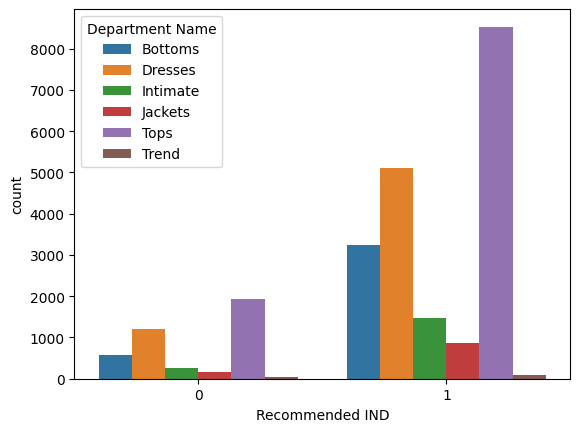

In [34]:
sbn.countplot(data=data, x='Recommended IND', hue='Department Name')